In [ ]:
!pip install tf-keras-vis

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.5/52.5 kB 2.7 MB/s eta 0:00:00


In [ ]:
import numpy as np
from matplotlib import pyplot as plt
from matplotlib import cm
import tensorflow as tf
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.saliency import Saliency
from tf_keras_vis.utils.scores import CategoricalScore
from tf_keras_vis.utils.model_modifiers import ReplaceToLinear
from tf_keras_vis.gradcam_plus_plus import GradcamPlusPlus
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import VGG16 as Model

In [11]:
from google.colab import files
files.upload()

Saving cat.jpg to cat.jpg
Saving monk2.jpg to monk2.jpg
Saving monk.jpg to monk.jpg
Saving cat2.jpg to cat2.jpg


{'cat.jpg': b'\xff\xd8\xff\xe0\x00\x10JFIF\x00\x01\x01\x01\x00H\x00H\x00\x00\xff\xdb\x00C\x00\x06\x04\x05\x06\x05\x04\x06\x06\x05\x06\x07\x07\x06\x08\n\x10\n\n\t\t\n\x14\x0e\x0f\x0c\x10\x17\x14\x18\x18\x17\x14\x16\x16\x1a\x1d%\x1f\x1a\x1b#\x1c\x16\x16 , #&\')*)\x19\x1f-0-(0%()(\xff\xdb\x00C\x01\x07\x07\x07\n\x08\n\x13\n\n\x13(\x1a\x16\x1a((((((((((((((((((((((((((((((((((((((((((((((((((\xff\xc2\x00\x11\x08\x03\xe8\x02\x9c\x03\x01"\x00\x02\x11\x01\x03\x11\x01\xff\xc4\x00\x1b\x00\x00\x02\x03\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x02\x03\x00\x01\x04\x05\x06\x07\xff\xc4\x00\x18\x01\x01\x01\x01\x01\x01\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x00\x01\x02\x03\x04\xff\xda\x00\x0c\x03\x01\x00\x02\x10\x03\x10\x00\x00\x01\xf3\xd6S\xc5\xeb\x12\x93"\x92\x12\xea\xea\xc8H\x1a* \x95\x0b\x06,\x11!Z\x92\x15WE\xddYv7e\xca\x85\xcb\xb2\x10\x95Y\x01\xa10\r\x19chd\x06\\\x92\xa4\xb8QKJ\xb2\xb2\xa1\x9c$\x99\x05\xd9\xd8\x11\x96&\xdb$Y0\xc5\x99\xdc.2(\xc3(Y\x95\x90\xe1\xad\x1cdHp\x1b+\x02\x18\

In [12]:
!ls
from IPython.display import Image

cat2.jpg  cat.jpg  monk2.jpg  monk.jpg	sample_data


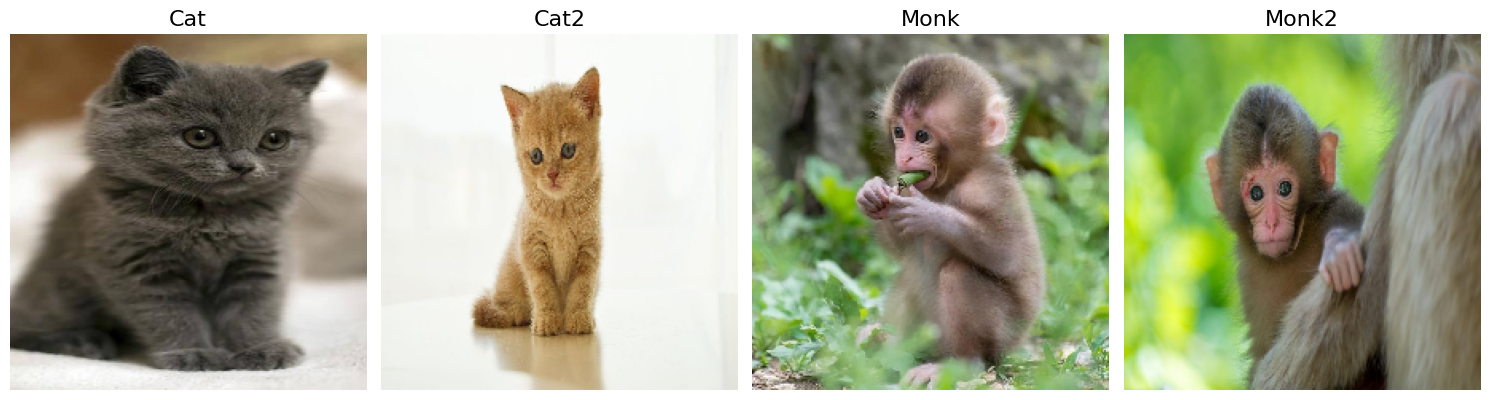

In [14]:
from tensorflow.keras.preprocessing.image import load_img
from tensorflow.keras.applications.vgg16 import preprocess_input
import matplotlib.pyplot as plt

# Загружаем предобученную модель VGG16 с весами ImageNet:
model = Model(weights='imagenet', include_top=True)
# Создадим списки изображений и путей к ним для загрузки:
imgTitleList = ['Cat', 'Cat2', 'Monk', 'Monk2']
imgPathList = ['/content/cat.jpg', '/content/cat2.jpg', '/content/monk.jpg', '/content/monk2.jpg']
# Загружаем изображения:
imgArr = np.asarray([np.array(load_img(imgPath, target_size=(224, 224))) for imgPath in imgPathList])
# Предобрабатываем изображения для подачи в модель (нормализация и изменение формата):
X = preprocess_input(imgArr)
# Визуализируем изображений:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(15, 15))
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imgArr[i])
    ax[i].axis('off')
plt.tight_layout()
plt.show()

In [15]:
# Меняем активацию последнего слоя модели на линейную:
replace2linear = ReplaceToLinear()
def model_modifier_function(cloned_model):
    cloned_model.layers[-1].activation = tf.keras.activations.linear
# Определяем функцию для получения оценок по выходным данным модели:
score = CategoricalScore([283, 284, 235, 248])
def score_function(output):
    return (output[0][283], output[1][284], output[2][235], output[3][248])

/usr/local/lib/python3.11/dist-packages/keras/src/models/functional.py:237: UserWarning: The structure of `inputs` doesn't match the expected structure.
Expected: keras_tensor_115
Received: inputs=['Tensor(shape=(4, 224, 224, 3))']
  warnings.warn(msg)


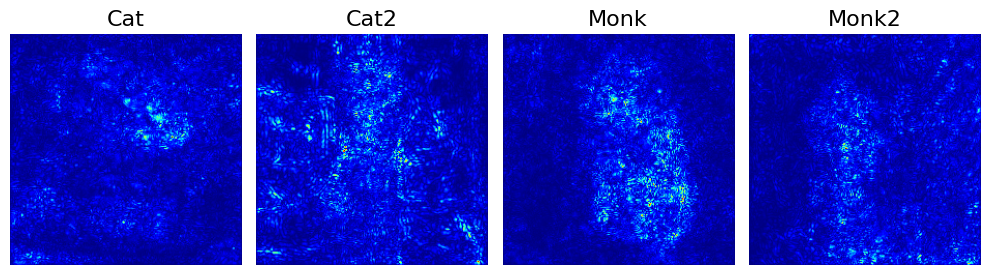

In [16]:
# Создаем объект Saliency для вычисления карты значимости:
saliency = Saliency(model, model_modifier=replace2linear, clone=True)
# Вычисляем карты значимости для заданных входных данных X с использованием заданного объекта score:
mapList = saliency(score, X)
# Отображаем полученные карты значимости:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(mapList[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

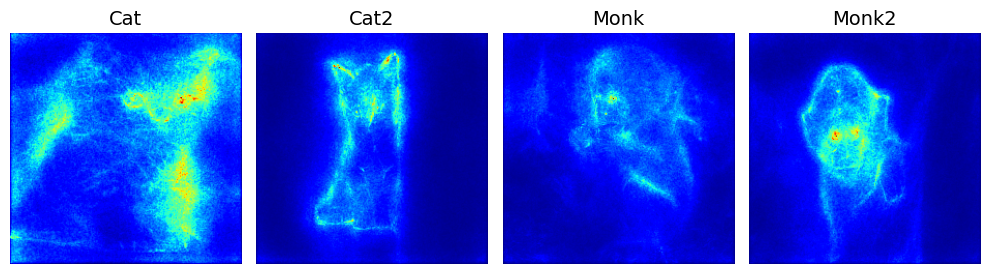

In [17]:
# Добавляем параметры для реализации сглаживания:
mapList = saliency(score, X, smooth_samples=90, smooth_noise=0.25)
# Отображаем полученные сглаженные карты значимости:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
for i, title in enumerate(imgTitleList):
    ax[i].set_title(title, fontsize=14)
    ax[i].imshow(mapList[i], cmap='jet')
    ax[i].axis('off')
plt.tight_layout()
plt.show()

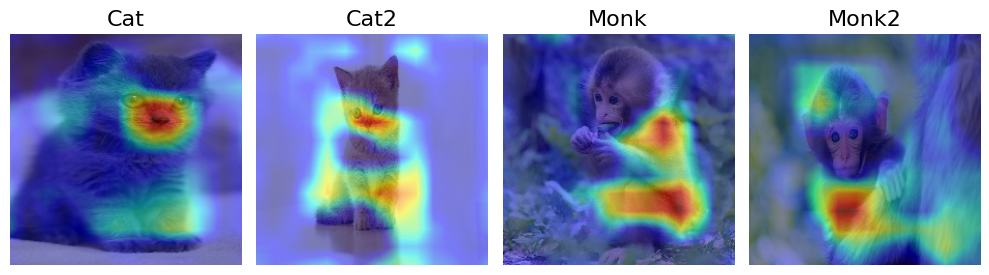

In [18]:
# Создаем объект Gradcam для вычисления карт по методу Grad-CAM:
gradcam = Gradcam(model, model_modifier=replace2linear, clone=True)
# Вычисляем карты Grad-CAM для заданных входных данных X, указывая предпоследний слой:
mapList = gradcam(score, X, penultimate_layer=-1)
# Визуализируем полученные изображения:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(10, 10))
for i, title in enumerate(imgTitleList):
    # Преобразуем карту значимости в формат изображения (целочисленный) с использованием цветовой карты 'jet':
    # Применяем цветовую карту и масштабируем значения:
    heatmap = np.uint8(cm.jet(mapList[i])[..., :4] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imgArr[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()

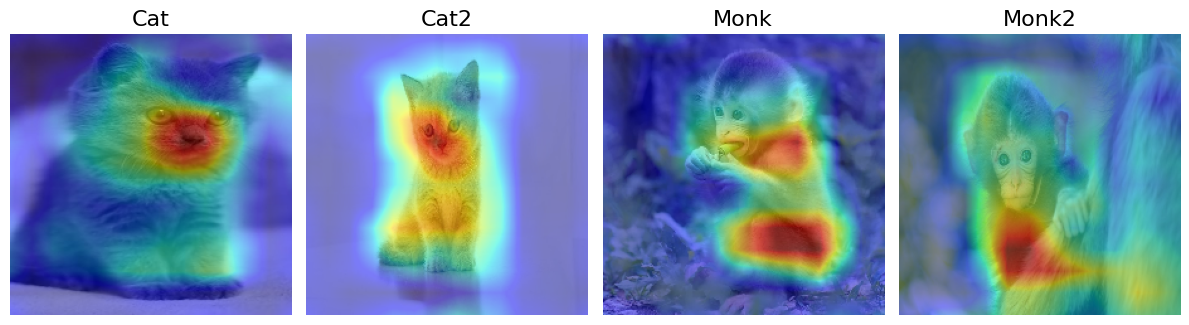

In [19]:
# Создаем объект GradcamPlusPlus для вычисления карт по методу Grad-CAM++:
gradcam = GradcamPlusPlus(model, model_modifier=replace2linear, clone=True)
# Вычисляем карты GradcamPlusPlus для заданных входных данных X, указывая предпоследний слой:
mapList = gradcam(score, X, penultimate_layer=-1)
# Визуализируем полученные изображения:
f, ax = plt.subplots(nrows=1, ncols=4, figsize=(12, 4))
for i, title in enumerate(imgTitleList):
    heatmap = np.uint8(cm.jet(mapList[i])[..., :4] * 255)
    ax[i].set_title(title, fontsize=16)
    ax[i].imshow(imgArr[i])
    ax[i].imshow(heatmap, cmap='jet', alpha=0.5)
    ax[i].axis('off')
plt.tight_layout()
plt.show()